## BIVAVRIATE ANALYSIS

The relationship between two variables 

### Dataset

Bank Marketing dataset that captures the  details of people contacted and thier reponse to a marketing campaign.
Dataset is available at the google drive location - https://drive.google.com/file/d/1hzu-PmNYCSmeZhCjcSXIJ5kU0rfMCrfM/view?usp=sharing

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('D:\DATASETS\Bank-Marketing.csv', skiprows=2)

The jobedu column needs cleansing - so the job and education components are stripped apart

In [7]:
df['job'] = df.jobedu.apply(lambda x : x.split(',')[0])
df['edu'] = df.jobedu.apply(lambda x : x.split(',')[1])

Available Columns

In [8]:
df.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response',
       'job', 'edu'],
      dtype='object')

### Getting started with Bivariate analysis !

The most common plots for Bivariate analysis are 

- Scatter Plots
- Correlation matrix and Heatmap
- Pair Plots

## Numerical versus Numerical Data

### Scatter Plots
Plot the variable on X and Y axis to see if there exists a relationship

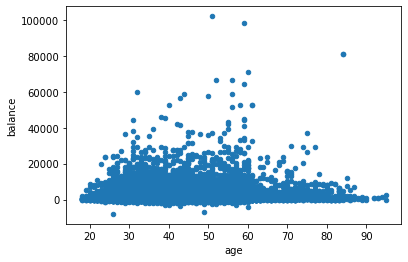

In [20]:
import matplotlib.pyplot as plt
df.plot.scatter(x ='age', y='balance')
plt.show()

### Pair Plots

A pair plot is a 2D categorical scatter plot that represents the pair wise relationship between the numerical variables in a data frame.For a dataset with N numerical values, it plots Nc2 i.e n!/2!*(n-2)! plots. Pair Plots are useful when the number of numerical variables is high, though it is not useful for representing higher dimensional data.

In the dataframe, there are 3 numerical values, and hence it returns 3!/(2!*1!) = 3 plots. The plot above the diagonal is a mirror of the plots below the diagonal (the x and y axis get interchanged). So, there are 3 distinct plots.


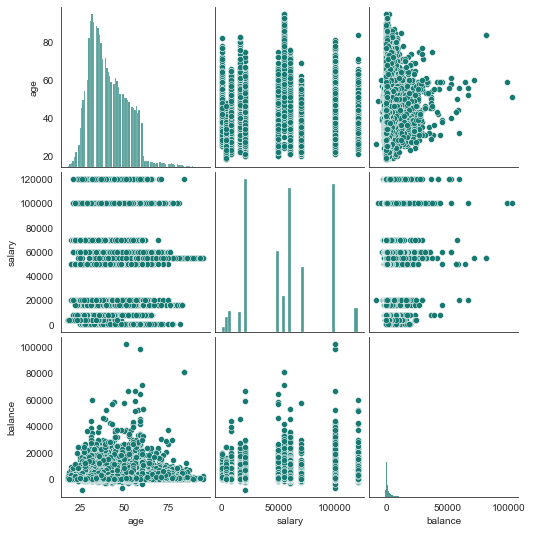

In [34]:
import seaborn as sns
sns.set_palette("BrBG_r")
sns.set_style("white")
sns.pairplot(df[['age','salary','balance']])

### Correlation Matrix and Heatmaps

A correlation matrix help find the relationship between 2 numeric variables . The correlation coefficient is a number between -1 and 1. A negative value implies a negative correlation whereas a positive value implies a positive correlation i.e with an increase in the value of the first variable, the second variable increases as well. 

How are the variables age, salary and balance correlated ?

In [9]:
df[["age","salary","balance"]].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055469
balance,0.097755,0.055469,1.000000


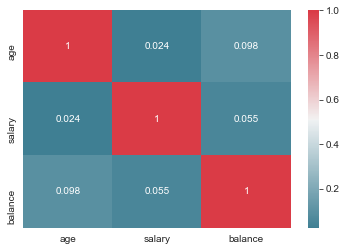

In [35]:
import seaborn as sns
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[["age","salary","balance"]].corr(), annot=True, cmap=cmap);

## Categorical  versus Numerical 

The response column in the dataset is a Categorical value; Yes or No

### Box Plots

Provides a visual representation of the five estimators of a given distribution

- Median (middle value)
- 1st quartile (25th Percentile)
- 3rd quartile (75th Percentile)
- Minimum
- Maximum


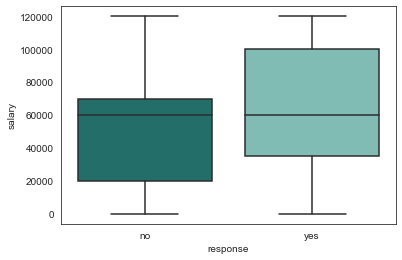

In [37]:
import seaborn as sns
sns.boxplot(data=df, x='response', y='salary');

Calculate some numerical statistics - for example 75th percentile value

In [39]:
def p75(x):
    return np.quantile(x,0.75)

In [41]:
df.groupby('response')['balance'].agg(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.094525,417,1345.0
yes,1804.832041,733,2159.5


Visuals 

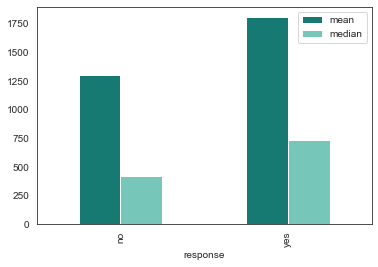

In [57]:
df.groupby('response')['balance'].agg(['mean','median']).plot.bar()
plt.show()                                     

## Categorical  versus Categorical 

In [59]:
df.response.value_counts()

no     39894
yes     5287
Name: response, dtype: int64

In [60]:
df.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

Convert categorical "Yes" and "No" values to boolean 1 and 0.
This basically implies - if the value in df.response column is a Yes- convert that to a 1 else 0.
The binary stream of 1's and 0's helps calculate average percentages and group stats in a more efficient way

There are sone NaN values in the response column; however since it is a response variable I've assumed that to be a No

In [68]:
df['Response-Flag'] = np.where(df.response=="yes",1,0)

In [67]:
df['Response-Flag'].value_counts()

0    39924
1     5287
Name: Response-Flag, dtype: int64

In [66]:
df['Response-Flag'].value_counts(normalize=True)

0    0.883059
1    0.116941
Name: Response-Flag, dtype: float64

In [70]:
df['Response-Flag'].unique()

array([0, 1])

### Response Rate for different education groups

In [72]:
df.groupby('edu')['Response-Flag'].mean()

edu
primary      0.086265
secondary    0.105551
tertiary     0.149989
unknown      0.135703
Name: Response-Flag, dtype: float64

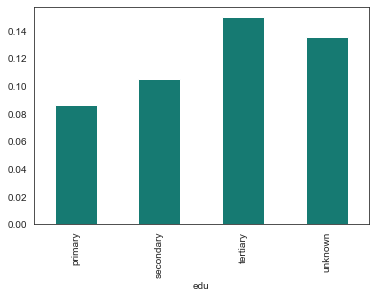

In [74]:
df.groupby('edu')['Response-Flag'].mean().plot.bar()
plt.show()

### Loan versus Response

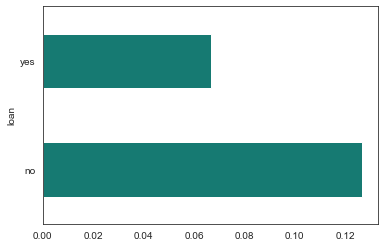

In [77]:
df.groupby('loan')['Response-Flag'].mean().plot.barh()
plt.show()

### Age versus Response

Given, the variable age has values spread over a large range; bin the age values into buckets, also referred to as binning

In [80]:
import pandas as pd
df['age-group'] = pd.cut(df.age, [0,30,40,50,60,9999], labels = ["<30","30-40","40-50","50-60","60+"])

In [81]:
df['age-group'].value_counts(normalize=True)

30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
60+      0.026288
Name: age-group, dtype: float64

Get the value_counts i.e 0 & 1 for each bin 

In [85]:
df.groupby('age-group')['Response-Flag'].value_counts()

age-group  Response-Flag
<30        0                 5884
           1                 1144
30-40      0                15868
           1                 1811
40-50      0                10216
           1                 1019
50-60      0                 7252
           1                  809
60+        0                  686
           1                  502
Name: Response-Flag, dtype: int64

Find the mean of successful response (i.e 1) for each bin

In [87]:
df.groupby('age-group')['Response-Flag'].mean()

age-group
<30      0.162777
30-40    0.102438
40-50    0.090699
50-60    0.100360
60+      0.422559
Name: Response-Flag, dtype: float64

Plot the mean 

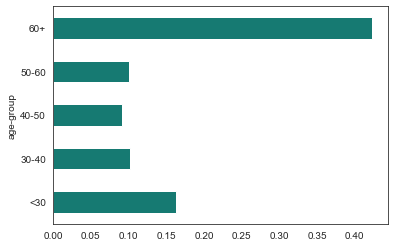

In [88]:
df.groupby('age-group')['Response-Flag'].mean().plot.barh();

## Multi-variate Analysis

Multivariate analysis involves analyzing more than 2 i.e three or more varaibles

### How do education and marital status impact Response?

In [92]:
Result = pd.pivot_table(data=df, index='edu', columns='marital', values='Response-Flag')
Result

marital,divorced,married,single
edu,,,
primary,0.138298,0.075486,0.106682
secondary,0.103375,0.094626,0.129213
tertiary,0.138001,0.129724,0.183431
unknown,0.142012,0.122414,0.162879


Plot a Heat map for the above data

<AxesSubplot:xlabel='marital', ylabel='edu'>

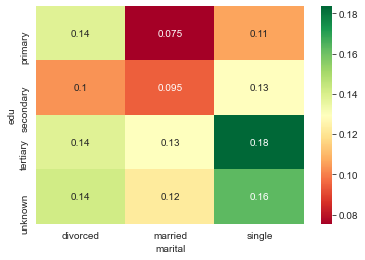

In [93]:
sns.heatmap(Result, annot=True, cmap="RdYlGn")

### How do education and marital status impact Response?

In [97]:
Res = pd.pivot_table(data=df, index='job', columns='edu', values='Response-Flag')
Res

edu,primary,secondary,tertiary,unknown
job,,,,
admin.,0.057416,0.118749,0.173077,0.105263
blue-collar,0.058010,0.080618,0.161074,0.072687
entrepreneur,0.065574,0.095941,0.075802,0.092105
housemaid,0.078150,0.086076,0.127168,0.088889
management,0.074830,0.086530,0.145366,0.198347
retired,0.223899,0.210366,0.275956,0.252101
self-employed,0.038462,0.074523,0.159664,0.128205
services,0.084058,0.085623,0.123762,0.126667
student,0.363636,0.297244,0.264574,0.263804


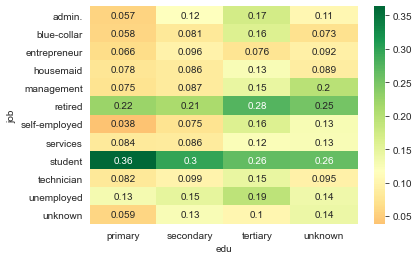

In [102]:
sns.heatmap(Res, annot=True, cmap="RdYlGn", center=0.117);

The above heatmap provides a lot of information in an easily palatable format. With a glimpse over the chart, I can easily interpret that students are most likely to respond positively and amongst students; the ones in primary education are most likely to respond positively